In [1]:
from qiskit import *

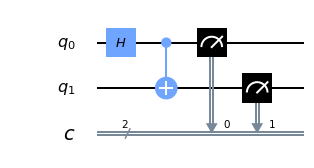

In [2]:
circ = QuantumCircuit(2,2)

circ.h(0)
circ.cx(0,1)
circ.measure(0,0)
circ.measure(1,1)

circ.draw(output='mpl')

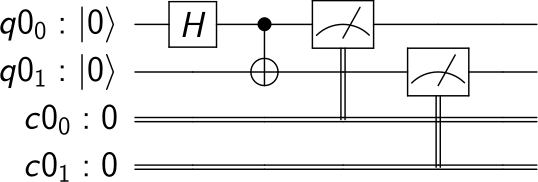

In [3]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
circ = QuantumCircuit(q,c)
circ.h(q[0])
circ.cx(q[0],q[1])
circ.measure(q,c)

circ.draw(output='latex')

In [4]:
Aer.backends()

[<QasmSimulator('qasm_simulator') from AerProvider()>,
 <StatevectorSimulator('statevector_simulator') from AerProvider()>,
 <UnitarySimulator('unitary_simulator') from AerProvider()>]

In [5]:
backend_sim = Aer.get_backend('qasm_simulator')

In [6]:
job_sim = execute(circ, backend_sim, shots=1024)

In [7]:
from qiskit.visualization import *

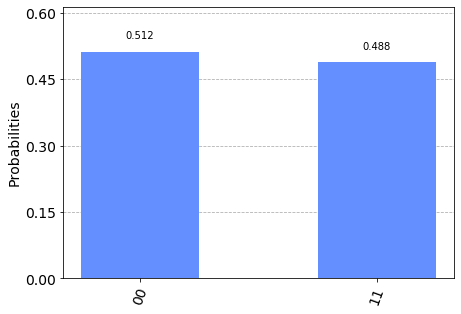

In [8]:
plot_histogram(job_sim.result().get_counts())

In [9]:
backend_svs = Aer.get_backend('statevector_simulator')

In [10]:
job_svs = execute(circ, backend_svs)
statevector = job_svs.result().get_statevector(circ)
statevector

#plot_state_city(statevector, title='Bell state')

array([0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j])

In [11]:
q = QuantumRegister(2)
circ2 = QuantumCircuit(q)
circ2.h(q[0])
circ2.cx(q[0],q[1])

job_svs = execute(circ2, backend_svs)
statevector = job_svs.result().get_statevector(circ2)
statevector

#plot_state_city(statevector, title='Bell state')

array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.70710678+0.j])

In [12]:
backend_uni = Aer.get_backend('unitary_simulator')

In [13]:
job_uni = execute(circ2, backend_uni)
unitary = job_uni.result().get_unitary(circ2)
unitary

array([[ 0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j],
       [ 0.        +0.00000000e+00j,  0.        +0.00000000e+00j,
         0.70710678+0.00000000e+00j,  0.70710678-8.65956056e-17j],
       [ 0.70710678+0.00000000e+00j, -0.70710678+8.65956056e-17j,
         0.        +0.00000000e+00j,  0.        +0.00000000e+00j]])

In [14]:
#IBMQ.save_account('yourAPItoken')
IBMQ.load_account() # Load account from disk 
IBMQ.providers()    # List all available providers

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [15]:
provider = IBMQ.get_provider(hub='ibm-q') 
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [16]:
from qiskit.tools.monitor import job_monitor, backend_monitor, backend_overview

In [17]:
backend_overview()
#T1 is the energy relaxation time: state 1 to state 0
#T2 is the dephasing time: slow perturbation along quantization axis

/home/franzf/.conda/envs/qiskit_env/lib/python3.7/site-packages/qiskit/providers/models/backendconfiguration.py:356: UserWarning: `dt` and `dtm` now have units of seconds(s) rather than nanoseconds(ns).
  warnings.warn('`dt` and `dtm` now have units of seconds(s) rather '


ibmq_armonk                  ibmq_essex                   ibmq_burlington
-----------                  ----------                   ---------------
Num. Qubits:  1              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 0              Pending Jobs: 4              Pending Jobs: 1
Least busy:   True           Least busy:   False          Least busy:   False
Operational:  True           Operational:  True           Operational:  True
Avg. T1:      110.1          Avg. T1:      82.6           Avg. T1:      73.4
Avg. T2:      131.1          Avg. T2:      125.9          Avg. T2:      67.7



ibmq_london                  ibmq_ourense                 ibmq_vigo
-----------                  ------------                 ---------
Num. Qubits:  5              Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 20             Pending Jobs: 1              Pending Jobs: 7
Least busy:   False          Least busy:   False          Least busy:   False
Operational:  True           O

In [18]:
backend_ibm = provider.get_backend('ibmqx2')

In [19]:
backend_monitor(backend_ibm)

ibmqx2
Configuration
-------------
    n_qubits: 5
    operational: True
    status_msg: active
    pending_jobs: 5
    backend_version: 2.0.2
    basis_gates: ['u1', 'u2', 'u3', 'cx', 'id']
    local: False
    simulator: False
    memory: True
    allow_q_object: True
    coupling_map: [[0, 1], [0, 2], [1, 0], [1, 2], [2, 0], [2, 1], [2, 3], [2, 4], [3, 2], [3, 4], [4, 2], [4, 3]]
    quantum_volume: 8
    allow_q_circuit: False
    n_registers: 1
    credits_required: True
    sample_name: sparrow
    open_pulse: False
    description: 5 qubit device
    max_shots: 8192
    allow_object_storage: True
    max_experiments: 75
    online_date: 2017-01-24T05:00:00+00:00
    url: None
    conditional: False
    backend_name: ibmqx2

Qubits [Name / Freq / T1 / T2 / U1 err / U2 err / U3 err / Readout err]
-----------------------------------------------------------------------
    Q0 / 5.28628 GHz / 52.12202 µs / 56.46267 µs / 0.0 / 0.00052 / 0.00104 / 0.017
    Q1 / 5.2379 GHz / 67.98595 µ

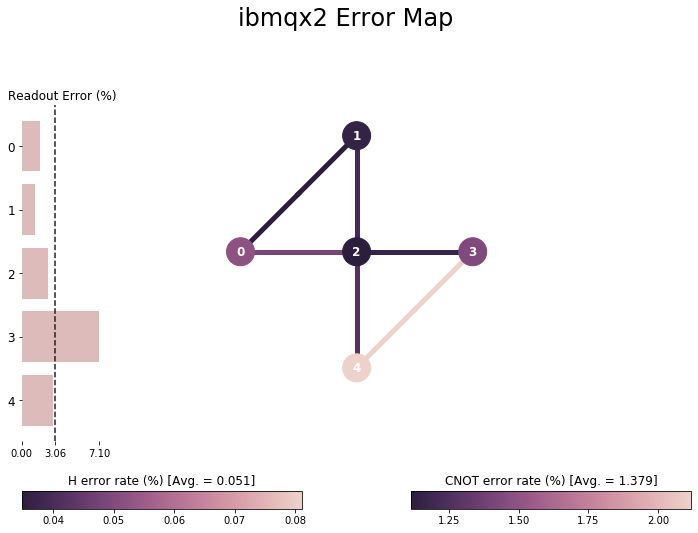

In [20]:
plot_error_map(backend_ibm)

In [22]:
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.device import basic_device_noise_model

properties = backend_ibm.properties()
ibmqx2noisemodel = basic_device_noise_model(properties)

In [23]:
job_sim_noise = execute(circ, backend_sim, noise_model=ibmqx2noisemodel, shots=1024)

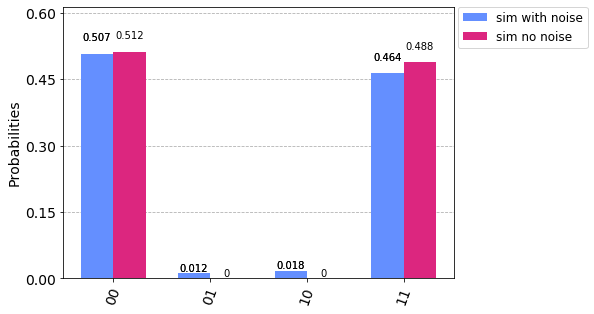

In [24]:
plot_histogram([job_sim_noise.result().get_counts(), job_sim.result().get_counts()],\
               legend=('sim with noise','sim no noise'))

In [25]:
job_ibm = execute(circ, backend_ibm, shots=1024)

In [ ]:
job_monitor(job_ibm)

Job Status: job is actively running

In [ ]:
plot_histogram([job_ibm.result().get_counts(), job_sim_noise.result().get_counts()],\
               legend=('ibm','sim with noise'))

In [ ]:
#
# Bonus: The Deutsch oracle
#

In [ ]:
def deutsch(case=0):
    q = QuantumRegister(2)
    c = ClassicalRegister(1)
    circ = QuantumCircuit(q,c)

    circ.x(q[1])
    circ.barrier()
    circ.h(q)
    circ.barrier()
    
    if case==1:
        circ.x(q[1])
    if case>=2:
        circ.cnot(q[0],q[1])
    if case==3:
        circ.x(q[0])

    circ.barrier()
    circ.h(q)
    circ.barrier()
    circ.measure(q[0],c[0])
    return circ

In [ ]:
deutsch(3).draw(output='latex')

In [ ]:
for i in (0,1,2,3):
    job_sim = execute(deutsch(i), backend_sim, shots=1024)
    print(job_sim.result().get_counts())